In [ ]:
# In this notebook varya is trying (finally) to do spatial downscaling of the era5data over langtang



In [25]:
# Load libraries

from TopoPyScale import topoclass as tc
from TopoPyScale import topo_plot as plot
import matplotlib.pyplot as plt

import pprint

In [26]:
# make config file
# load dem
# do dem things

In [27]:
# ========= STEP 1 ==========
# Load Configuration
config_file = './config_spatial.yml'
mp = tc.Topoclass(config_file)


---> Output directory cleaned
---> no FSM directory to clean
---> no ensemble directory to clean

---> DEM file found
{'latN': 29, 'latS': 28, 'lonW': 85, 'lonE': 86}
Project lat/lon extent:

	------------------------------
	|        North:29          |
	|West:85          East:86|
	|        South:28          |
	------------------------------


---> Loading ERA5 surf climate forcing
Start =  2020-Jan
End =  2020-Jan
ECWMF SURF data found:
0    SURF_202001.nc
Name: target_file, dtype: object


---> Loading ERA5 plev climate forcing
Start =  2020-Jan
End =  2020-Jan
ECWMF PLEV data found:
0    PLEV_202001.nc
Name: target_file, dtype: object


## print out configurations 

In [28]:
# Print out config
print('--------- Project Configuration ------')
pprint.pprint(mp.config.project)
print('\n')
print('--------- Climate Data Configuration ------')
pprint.pprint(mp.config.climate)
print('\n')
print('--------- DEM Data Configuration ------')
pprint.pprint(mp.config.dem)
print('\n')
print('--------- Sampling Configuration ------')
pprint.pprint(mp.config.sampling)
print('\n')
print('--------- toposcale Configuration ------')
pprint.pprint(mp.config.sampling)
print('\n')
print('--------- Outputs Configuration ------')
pprint.pprint(mp.config.outputs)
print('\n')

--------- Project Configuration ------
{'CPU_cores': 8,
 'authors': ['Filhol S.',
             'Aalstad K.',
             'Fiddes J.',
             DefaultMunch({}, {'adjusted': 'bazilova v'})],
 'climate': 'era5',
 'date': 'Feb 2024',
 'description': 'Downscaling for Finse, Benchmarking TopoPyScale',
 'directory': './',
 'end': datetime.date(2020, 1, 30),
 'extent': {'latN': 29, 'latS': 28, 'lonE': 86, 'lonW': 85},
 'name': 'Langtang',
 'split': DefaultMunch({}, {'IO': False, 'time': 1, 'space': 'None'}),
 'start': datetime.date(2020, 1, 1)}


--------- Climate Data Configuration ------
{'era5': {'download_threads': 17,
          'path': 'inputs/climate/',
          'plevels': [350,
                      400,
                      450,
                      500,
                      550,
                      600,
                      650,
                      700,
                      750,
                      775,
                      800,
                      825,
          

## 1.2. Load DEM and Compute Morphometrics


In [29]:
%%time 
# Load DEM and derive terrain parameters
mp.compute_dem_param()


---> No ds_param.nc Dataset found. DEM .//inputs/dem/langtangish_dem.tif available.

---> Extracting DEM parameters (slope, aspect, svf)
Computing slope and aspect ...
Computing svf ...
---> File outputs/ds_param.nc saved
CPU times: user 4min 34s, sys: 1.21 s, total: 4min 36s
Wall time: 4min 37s


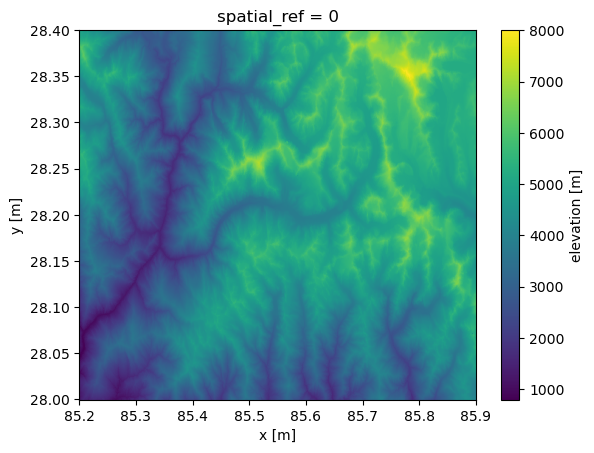

In [30]:
mp.toposub.ds_param.elevation.plot()


## 1.3. Segment DEM in Clusters


In [31]:
mp.extract_topo_param()


---> Scaling data prior to clustering
---> Clustering with Mini-Batch K-means in 10 clusters
---> Mini-Batch Kmean finished in 1.0s
---> File outputs/ds_param.nc saved
Convert coordinates from EPSG:32632 to EPSG:4326
---> Centroids file df_centroids.pck saved


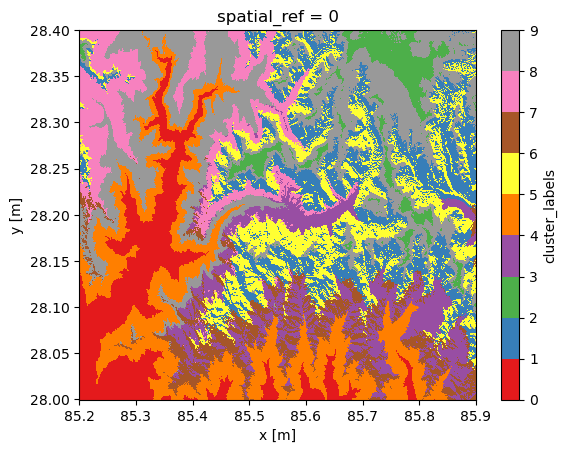

In [32]:
mp.toposub.ds_param.cluster_labels.plot(cmap=plt.cm.Set1)


In [33]:
print('Dataframe containing clusters average properties:\n')
mp.toposub.df_centroids

Dataframe containing clusters average properties:



,x,y,elevation,slope,aspect_cos,aspect_sin,svf,spatial_ref,aspect,point_id,lon,lat
0,85.344906,28.117067,2033.679293,1.570765,0.070112,-0.076816,0.080382,0.0,3.189078,0,4.512021,0.000254
1,85.690205,28.234580,5101.113194,1.570752,0.670742,-0.220979,0.078071,0.0,3.734249,1,4.512024,0.000255
2,85.722952,28.314336,6490.622489,1.570779,-0.062959,0.014536,0.326901,0.0,3.162694,2,4.512024,0.000255
3,85.650067,28.105417,4063.518597,1.570769,-0.340600,-0.039806,0.025145,0.0,3.177804,3,4.512023,0.000253
4,85.454575,28.119329,2918.927709,1.570759,0.046134,0.032208,0.065075,0.0,3.153196,4,4.512022,0.000254
5,85.648272,28.212691,4984.019695,1.564003,-0.612528,0.206736,0.037099,0.0,2.773470,5,4.512023,0.000254
6,85.587133,28.077186,4084.632591,1.570780,0.715798,-0.129931,0.246895,0.0,3.552883,6,4.512023,0.000253
7,85.380888,28.300428,4335.811568,1.570777,0.085473,0.127570,0.081516,0.0,2.991407,7,4.512021,0.000255
8,85.718762,28.290807,5703.990905,1.570769,0.026125,0.051742,0.099841,0.0,2.982706,8,4.512024,0.000255
9,85.371771,28.282459,3445.594140,1.570761,-0.057357,-0.091491,0.044770,0.0,3.241201,9,4.512021,0.000255


## 1.4. Compute Solar Geometry


In [34]:
mp.compute_solar_geometry()



---> Computing solar geometry
---> File outputs/ds_solar.nc saved


In [35]:
mp.ds_solar


<xarray.Dataset>
Dimensions:         (point_id: 10, time: 720)
Coordinates:
  * point_id        (point_id) int64 0 1 2 3 4 5 6 7 8 9
  * time            (time) datetime64[ns] 2020-01-01 ... 2020-01-30T23:00:00
    reference_time  datetime64[ns] 2020-01-01
Data variables:
    zenith          (point_id, time) float64 2.734 2.629 2.442 ... 2.559 2.754
    azimuth         (point_id, time) float64 -0.1521 -0.6465 ... 0.9882 0.645
    elevation       (point_id, time) float64 -1.163 -1.058 ... -0.9885 -1.183
    mu0             (point_id, time) float64 -0.0 -0.0 -0.0 ... -0.0 -0.0 -0.0
    SWtoa           (point_id, time) float64 -0.0 -0.0 -0.0 ... -0.0 -0.0 -0.0
    sunset          (point_id, time) bool True True True True ... True True True

Text(0.5, 1.0, 'Solar Zenith')

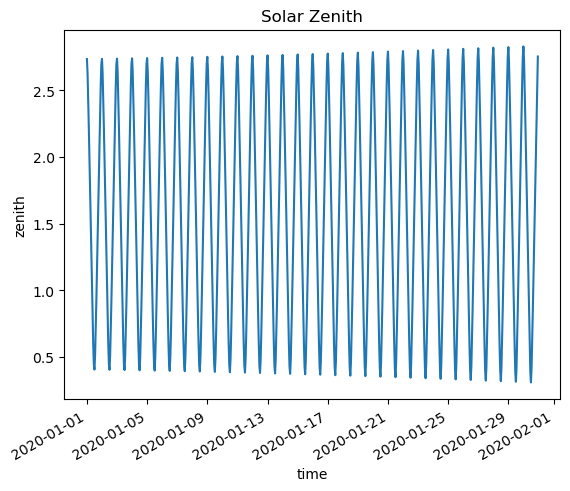

In [36]:
mp.ds_solar.zenith.sel(point_id=1).plot()
plt.title('Solar Zenith')

## 1.5. Compute Horizon Angles


In [37]:
%%time
mp.compute_horizon()



---> Computing horizons with 10 degree increments
---> File outputs/da_horizon.nc saved
---> Centroids file df_centroids.pck updated with horizons


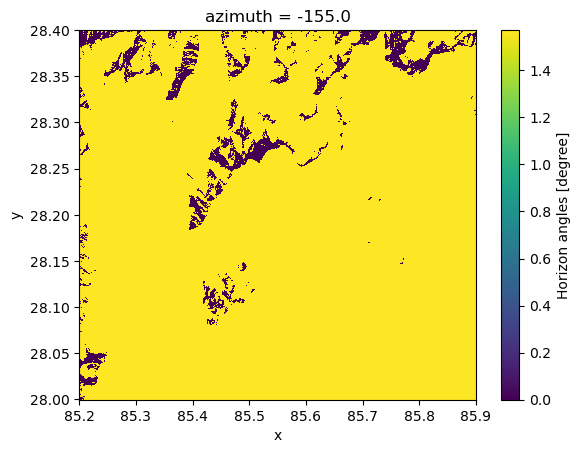

In [38]:
mp.da_horizon.isel(azimuth=2).plot()


## 1.6. Downscale Climate to Clusters


In [39]:
mp.downscale_climate()



---> Downscaling climate to list of points using TopoScale
outputs/tmp cleaned
No ERA5T  PRESSURE data present with additional dimension <expver>
Preparing plev for point 0
Preparing plev for point 1
Preparing plev for point 2
Preparing plev for point 3
Preparing plev for point 4
Preparing plev for point 5
Preparing plev for point 6
Preparing plev for point 7
Preparing plev for point 8
Preparing plev for point 9


IndexError: index 8 is out of bounds for axis 0 with size 8